# Exploratory Data Analysis on the Common Vulnerabilities and Exposures Dataset
## by(Raji Gbenga Kabir)

In [309]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [310]:
#loading all datasets
cve = pd.read_csv('cve.csv')
products = pd.read_csv('products.csv')
vendors = pd.read_csv('vendors.csv')
vendors_products = pd.read_csv('vendor_product.csv', index_col=0)

Accessing all Dataset

CVE dataset

In [311]:
cve.shape

(89660, 13)

In [312]:
cve.head()

,Unnamed: 0,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,CVE-2019-16548,2019-11-21 15:15:00,2019-11-21 15:15:00,6.8,352,Cross-Site Request Forgery (CSRF),A cross-site request forgery vulnerability in ...,NaN,NaN,NaN,NaN,NaN,NaN
1,CVE-2019-16547,2019-11-21 15:15:00,2019-11-21 15:15:00,4.0,732,Incorrect Permission Assignment for Critical ...,Missing permission checks in various API endpo...,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2019-16546,2019-11-21 15:15:00,2019-11-21 15:15:00,4.3,639,Authorization Bypass Through User-Controlled Key,Jenkins Google Compute Engine Plugin 4.1.1 and...,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2013-2092,2019-11-20 21:22:00,2019-11-20 21:15:00,4.3,79,Improper Neutralization of Input During Web P...,Cross-site Scripting (XSS) in Dolibarr ERP/CRM...,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2013-2091,2019-11-20 20:15:00,2019-11-20 20:15:00,7.5,89,Improper Neutralization of Special Elements u...,SQL injection vulnerability in Dolibarr ERP/CR...,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
cve.rename(columns={'Unnamed: 0': 'cve_id'}, inplace=True)

In [314]:
cve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89660 entries, 0 to 89659
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cve_id                  89660 non-null  object 
 1   mod_date                89660 non-null  object 
 2   pub_date                89660 non-null  object 
 3   cvss                    89660 non-null  float64
 4   cwe_code                89660 non-null  int64  
 5   cwe_name                89660 non-null  object 
 6   summary                 89660 non-null  object 
 7   access_authentication   88776 non-null  object 
 8   access_complexity       88776 non-null  object 
 9   access_vector           88776 non-null  object 
 10  impact_availability     88776 non-null  object 
 11  impact_confidentiality  88776 non-null  object 
 12  impact_integrity        88776 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 8.9+ MB


In [315]:
cve.duplicated().sum()

0

In [316]:
cve.nunique()

cve_id                    89660
mod_date                  33173
pub_date                  13235
cvss                         70
cwe_code                    170
cwe_name                    170
summary                   87432
access_authentication         3
access_complexity             3
access_vector                 3
impact_availability           3
impact_confidentiality        3
impact_integrity              3
dtype: int64

In [317]:
cve.isna().sum()

cve_id                      0
mod_date                    0
pub_date                    0
cvss                        0
cwe_code                    0
cwe_name                    0
summary                     0
access_authentication     884
access_complexity         884
access_vector             884
impact_availability       884
impact_confidentiality    884
impact_integrity          884
dtype: int64

In [318]:
cve.describe(include='all')

,cve_id,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
count,89660,89660,89660,89660.000000,89660.000000,89660,89660,88776,88776,88776,88776,88776,88776
unique,89660,33173,13235,NaN,NaN,170,87432,3,3,3,3,3,3
top,CVE-2019-16548,2019-10-03 00:03:00,2018-07-09 06:29:00,NaN,NaN,Improper Restriction of Operations within the...,A remote code execution vulnerability was iden...,NONE,LOW,NETWORK,PARTIAL,PARTIAL,PARTIAL
freq,1,3641,322,NaN,NaN,12344,83,76777,45746,76104,35991,42039,46357
mean,NaN,NaN,NaN,6.021429,199.690854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.994757,176.177244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,4.300000,79.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,5.800000,119.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,7.500000,284.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PRODUCTS datasets

In [319]:
products.shape

(180585, 2)

In [320]:
products.head()

,cve_id,vulnerable_product
0,CVE-2019-16548,google_compute_engine
1,CVE-2019-16547,google_compute_engine
2,CVE-2019-16546,google_compute_engine
3,CVE-2013-2092,dolibarr
4,CVE-2013-2091,dolibarr


In [321]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180585 entries, 0 to 180584
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   cve_id              180585 non-null  object
 1   vulnerable_product  180543 non-null  object
dtypes: object(2)
memory usage: 2.8+ MB


In [322]:
products.duplicated().sum()

0

In [323]:
products.isna().sum()

cve_id                 0
vulnerable_product    42
dtype: int64

In [324]:
products.describe(include='all')

,cve_id,vulnerable_product
count,180585,180543
unique,89660,40553
top,CVE-2018-12207,debian_linux
freq,755,2972


VENDORS datasets

In [325]:
vendors.shape

(101658, 2)

In [326]:
vendors.head()

,Unnamed: 0,vendor
0,CVE-2019-16548,jenkins
1,CVE-2019-16547,jenkins
2,CVE-2019-16546,jenkins
3,CVE-2013-2092,dolibarr
4,CVE-2013-2091,dolibarr


In [327]:
vendors.rename(columns={'Unnamed: 0': 'cve_id'}, inplace=True)

In [328]:
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101658 entries, 0 to 101657
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   cve_id  101658 non-null  object
 1   vendor  101616 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [329]:
vendors.duplicated().sum()

0

In [330]:
vendors.isna().sum()

cve_id     0
vendor    42
dtype: int64

In [331]:
vendors.describe(include='all')

,cve_id,vendor
count,101658,101616
unique,89660,16175
top,CVE-2007-0018,microsoft
freq,33,5037


VENDORS PRODUCTS dataset

In [332]:
vendors_products.shape

(43081, 2)

In [333]:
vendors_products.head()

,vendor,product
0,jenkins,google_compute_engine
1,dolibarr,dolibarr
2,mediawiki,mediawiki
3,debian,debian_linux
4,redhat,enterprise_linux


In [334]:
vendors_products.duplicated().sum()

0

In [335]:
vendors_products.isna().sum()

vendor     0
product    0
dtype: int64

In [336]:
vendors_products.describe(include='all')

,vendor,product
count,43081,43081
unique,16175,40553
top,hp,cms
freq,2541,18


## Wrangling the datasets

In [338]:
#creating a new instance of all datasets to wrangle
cve_clean = cve.copy()
products_clean = products.copy()
vendors_clean = vendors.copy()
vendors_products_clean = vendors_products.copy()

CVE dataset

correcting the datatypes

In [339]:
cve['mod_date'] = pd.to_datetime(cve['mod_date'])
cve['pub_date'] = pd.to_datetime(cve['pub_date'])
cve['cwe_code'] = cve['cwe_code'].astype(str)

In [340]:
ordinal_var_dict = {'access_authentication': ['NONE', 'SINGLE', 'MULTIPLE'],
                    'access_complexity': ['LOW', 'MEDIUM', 'HIGH'],
                    'access_vector': ['LOCAL', 'ADJACENT_NETWORK', 'NETWORK'],
                   'impact_availability': ['NONE', 'PARTIAL', 'COMPLETE'],
                   'impact_confidentiality': ['NONE', 'PARTIAL', 'COMPLETE'],
                   'impact_integrity': ['NONE', 'PARTIAL', 'COMPLETE']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    cve[var] = cve[var].astype(ordered_var)

I converted the mod_date column and the pub_date column to datetime. Then I converted cwe_code to a string object because it as the same unique number as cwe_name, so I inferred that it is a index number to cwe_name column i.e each cwe_code conforms to a particular cwe_name. Also I converted the access_authentication, access_complexity, access_vector, impact_availability, impact_confidentiality, impact_integrity columns into categorical datatypes.

In [341]:
#dropping all null values for all datasets
cve_clean.dropna(inplace=True)
products_clean.dropna(inplace=True)
vendors_clean.dropna(inplace=True)
vendors_products_clean.dropna(inplace=True)

In [235]:
categorical = ['access_authentication', 'access_complexity', 'access_vector', 'impact_availability', 'impact_confidentiality', 'impact_integrity']
numerical = ['cvss']

## Problem Statement
For the given datasets, we could focus on three problems, which are:
<ol>
    <li>Tell the vendor, which features to focus on in other to make it's products less vulnerable</li>
    <li>Tell the consumer which are interested in getting a products which products is less vulnerable</li>
    <li>Tell the customers which vendor to patronise i.e the vendors whose products are less vulnerable </li>
</ol>
For this analysis, I will be focusing on the first problem statement which is to tell the vendor which features to focus on to make it's products less vulnerable by looking at the relationships between the features and the common vulnerability scoring system(cvss)

Distribution of  CVSS

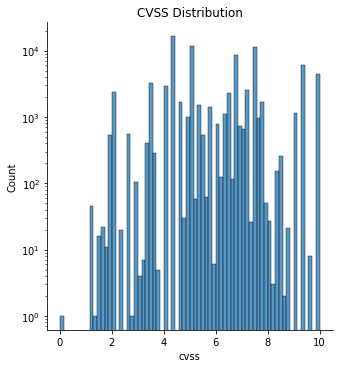

In [262]:
sb.displot(data=cve_copy, x='cvss', kde=False);
plt.title('CVSS Distribution')
plt.yscale('log')

It shows a multimodal distribution with most of the common vulnerability score ranging between 4.3 and 8.5. 

What are the top most common vulnerabilities?

In [258]:
df.cwe_name.value_counts().head(20)

 Improper Restriction of Operations within the Bounds of a Memory Buffer                        46433
 Information Exposure                                                                           22540
 Improper Input Validation                                                                      22370
 Permissions Privileges and Access Controls                                                     19022
 Improper Neutralization of Input During Web Page Generation ('Cross-site Scripting')           16637
 Resource Management Errors                                                                      8892
 Out-of-bounds Read                                                                              7123
 Use After Free                                                                                  6894
 Improper Neutralization of Special Elements used in an SQL Command ('SQL Injection')            6535
 Improper Access Control                                                          

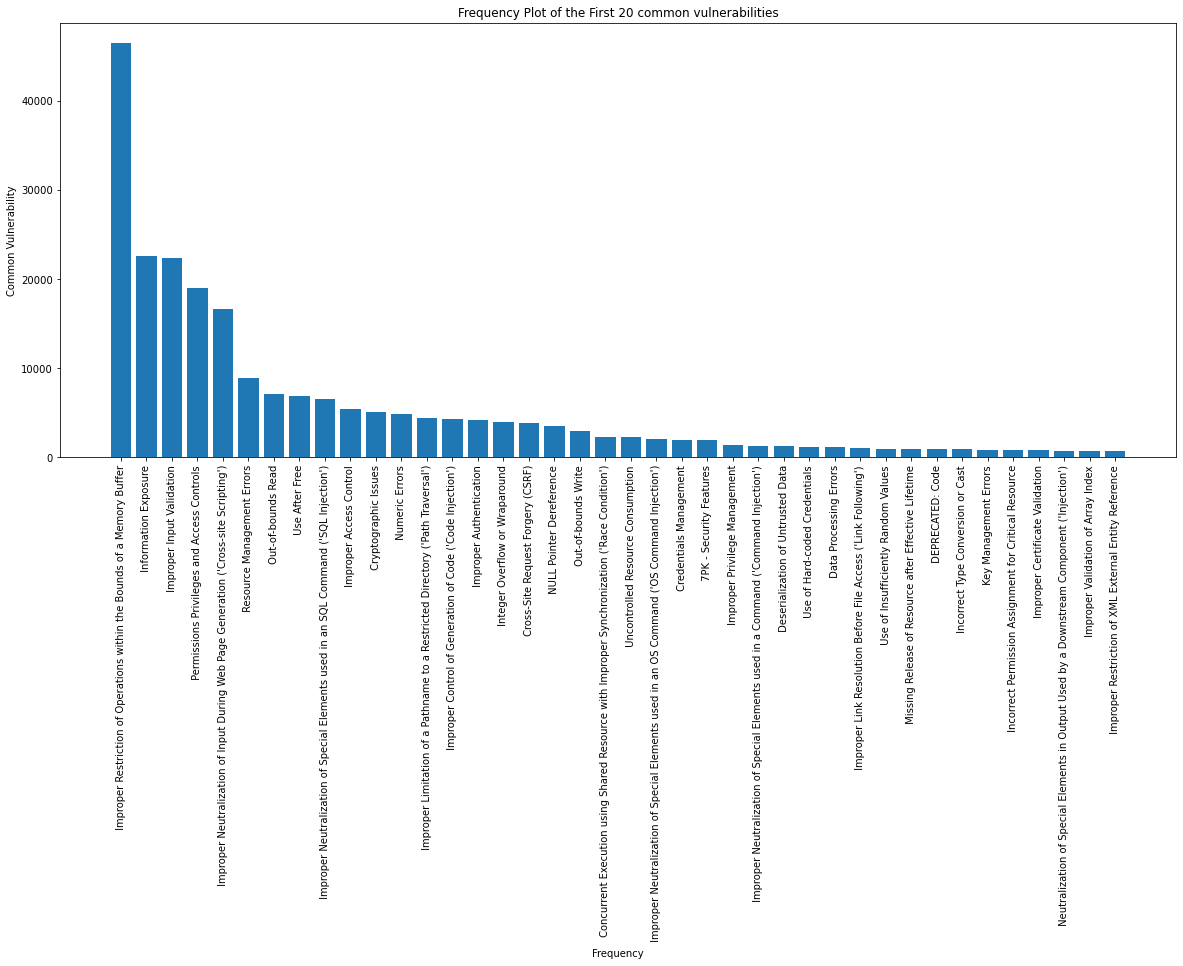

In [268]:
plt.figure(figsize=(20,8));
plt.bar(df.cwe_name.value_counts().head(40).index, df.cwe_name.value_counts().head(40).values);
plt.title("Frequency Plot of the First 20 common vulnerabilities");
plt.xlabel('Frequency');
plt.ylabel('Common Vulnerability');
plt.xticks(rotation=90);

The chart above shows the frequency of common vulnerability, with Improper Restriction of Operations within the Bounds of a Memory Buffer, Improper Neutralization of Input During Web Page Generation ('Cross-site Scripting'), Improper Input Validation, Information Exposure and Permissions Privileges and Access Controls having about 57% of the entire data.

Frequency of access authentication, access complexity, access vector, impact availability, impact confidentiality, impact integrity values.

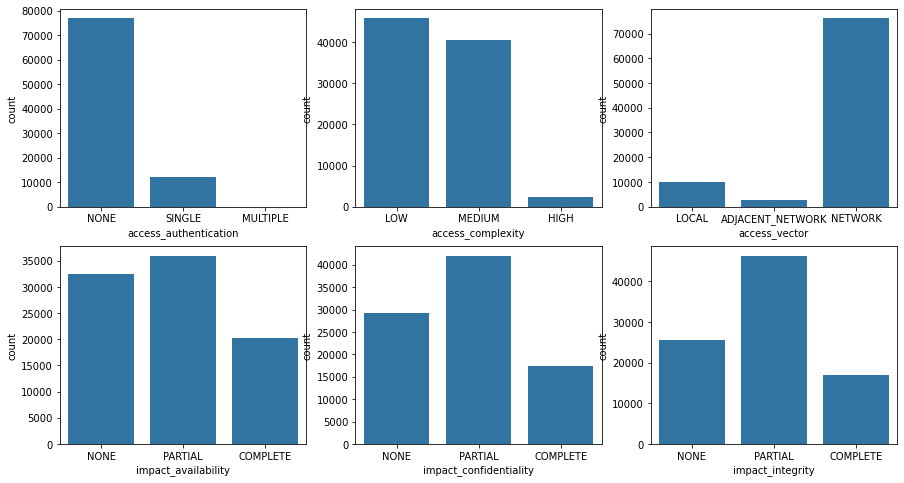

In [259]:
plt.figure(figsize=(15,8))
default_color = sb.color_palette()[0]

plt.subplot(2,3,1);
sb.countplot(data = cve_copy, x = 'access_authentication', color = default_color);
plt.subplot(2,3,2);
sb.countplot(data = cve_copy, x = 'access_complexity', color = default_color);
plt.subplot(2,3,3);
sb.countplot(data = cve_copy, x = 'access_vector', color = default_color);
plt.subplot(2,3,4)
sb.countplot(data = cve_copy, x = 'impact_availability', color = default_color);
plt.subplot(2,3,5)
sb.countplot(data = cve_copy, x = 'impact_confidentiality', color = default_color);
plt.subplot(2,3,6)
sb.countplot(data = cve_copy, x = 'impact_integrity', color = default_color);


plt.show()

The above chart shows count of each values in the categorical variables. I observed that:
<ol>
    <li>a high percentage of the access authentication are none</li>
    <li>most access complexity are either low or medium</li>
    <li>network access vector has the highest percentage</li>
    <li>a high frequncy of the impact availability, impact confidentiality and impact integrity are partial</li>
</ol>

Next, lets look at how the categorical variables affect the common vulnerability scores.

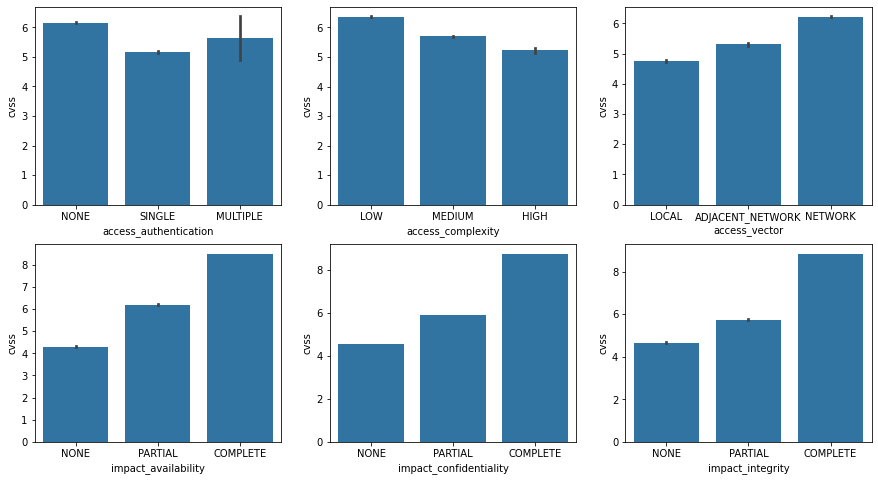

In [269]:
plt.figure(figsize=(15,8))
default_color = sb.color_palette()[0]

plt.subplot(2,3,1);
sb.barplot(data = cve_copy, x = 'access_authentication', y='cvss', color = default_color);
plt.subplot(2,3,2);
sb.barplot(data = cve_copy, x = 'access_complexity', y='cvss', color = default_color);
plt.subplot(2,3,3);
sb.barplot(data = cve_copy, x = 'access_vector', y='cvss', color = default_color);
plt.subplot(2,3,4)
sb.barplot(data = cve_copy, x = 'impact_availability', y='cvss', color = default_color);
plt.subplot(2,3,5)
sb.barplot(data = cve_copy, x = 'impact_confidentiality', y='cvss', color = default_color);
plt.subplot(2,3,6)
sb.barplot(data = cve_copy, x = 'impact_integrity', y='cvss', color = default_color);


plt.show()

From the above charts, I observed that:
<ol>
    <li>as the access complexity increase from low to high the average cvss decreases</li>
    <li>as the access vector increase from local to adjacent network, and to network, the mean cvss increases.</li>
    <li>products with no access authentication have higher cvss while those with single access authentication have lower cvss</li>
    <li>as impact availability, impact confidentiality and impact integrity moves from none to partial and then to  complete, the cvss increases.</li>
</ol>
Therefore, It is seen that it is better to have single access authentication than to have no or multiple access authentication. Also, products with very complex access and a local access vector are less vulnerable.

Since all impact variables shows the same trend, Let's look at the relationship between the access variables which are (access authentication, access complexity, access vector).

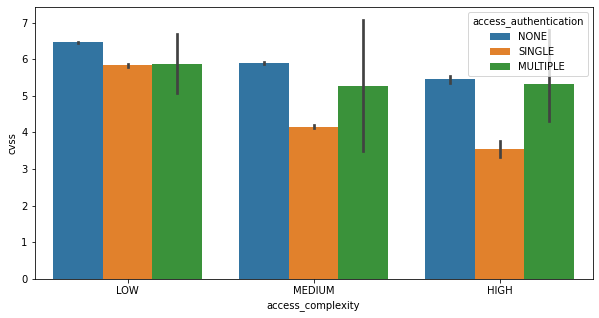

In [285]:
plt.figure(figsize=(10,5))
sb.barplot(data=cve_copy, x='access_complexity', y='cvss', hue='access_authentication');

Combining both the access complexity and authentication together, I observed that for products with medium and high complex access the single authentication access, still has the lowest cvss value, but the low complex access, both single and multiple have the same cvss value.

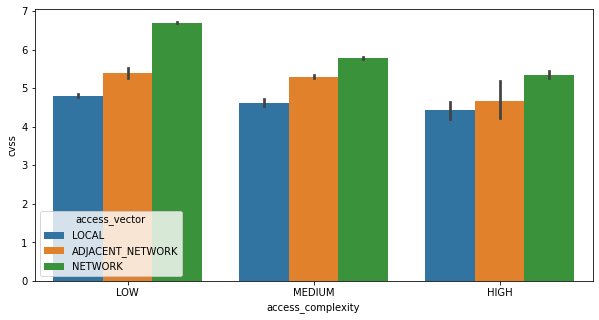

In [287]:
plt.figure(figsize=(10,5))
sb.barplot(data=cve_copy, x='access_complexity', y='cvss', hue='access_vector');

Combining both the access complexity and access vector, I infered that to have a less vulnerable product (low cvss), the vendor should have a high access complexity and a local access vector.

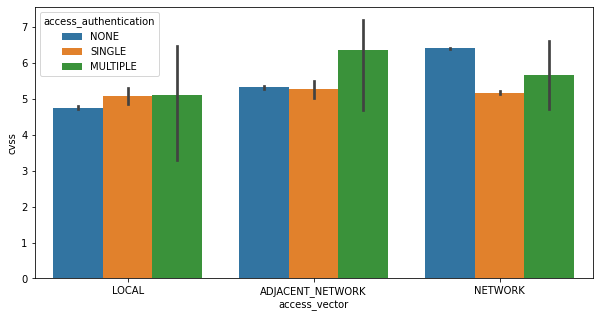

In [283]:
plt.figure(figsize=(10,5))
sb.barplot(data=cve_copy, x='access_vector', y='cvss', hue='access_authentication');

Combining both the access vector and access authentication, I observed that it is safest to use single access authentication for all access vector except for local access vector, which it is safest not to have an access authentication at all.


## Conclusion
> From the exploration done on the required dataset, It is shown that for a product to be less vulnerable (to have low cvss) the access complexity should be high, it should have a single access authentication for both adjacent network and network access vector and no access authentication for local access vector.